In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np

C:\Users\hennecol\AppData\Local\Temp\ipykernel_9444\3857948191.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hennecol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hennecol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


K Means clustering

In [ ]:
# Chargement des données
df = pd.read_csv("C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/2 analysis and first preprocessing/liste_videos_pour_script_and_infos.csv")
df = df.iloc[:-1]
df.tail(1)
descriptions = df['description2'].values

# Prétraitement du texte
def preprocess_text(text):
    # Tokenisation et suppression des stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_descriptions = [preprocess_text(description) for description in descriptions]

# Vectorisation des descriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_descriptions)

# Clustering K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Ajout des étiquettes de cluster au dataframe
df['cluster'] = kmeans.labels_

# Affichage des résultats
print(df[['description2', 'cluster']].head())


                                        description2  cluster
0   No, I cannot spot a situation that will end i...        1
1   No, I cannot spot a situation that will end i...        1
2   Yes, I can spot a situation that will end in ...        0
3   No, I cannot spot a situation that will end i...        1
4   No, I cannot spot a situation that will end i...        2


In [6]:
df

,nom,duree,type,ordre,risk_time,description,color,description2,color2,Unnamed: 9,cluster
0,15_low1_1.mp4,22.67,1.0,1.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1
1,15_low3_2.mp4,11.83,1.0,2.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1
2,5 - weekly 11.mp4,4.40,1.0,3.0,3.5,"Yes, I can spot a situation where an accident...",NaN,"Yes, I can spot a situation that will end in ...",1.0,NaN,0
3,11 controls 6.mp4,11.58,1.0,4.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1
4,10 controls 7.mp4,15.19,1.0,5.0,10.2,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,2
5,1 weekly - 6.mp4,5.31,1.0,6.0,3.7,"Yes, I can spot a situation where an accident...",NaN,"No, there is no situation in the video that w...",NaN,NaN,1
6,2 compil - 1.mp4,8.55,1.0,7.0,5.5,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",NaN,NaN,1
7,6 - weekly 7.mp4,15.02,1.0,8.0,1.4,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1
8,10 controls 2.mp4,22.21,1.0,9.0,10,"Yes, there is a situation where an accident i...",NaN,There is a situation that will end in an acci...,NaN,NaN,0
9,15_low1_3.mp4,22.74,1.0,10.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,0


In [7]:
# Extraction des caractéristiques importantes pour chaque cluster
def extract_features_from_cluster(cluster_texts, lang='english'):
    stop_words = stopwords.words(lang)
    vectorizer = TfidfVectorizer(max_features=10, stop_words=stop_words)  # Utiliser les stop words de nltk
    X = vectorizer.fit_transform(cluster_texts)
    feature_array = np.array(vectorizer.get_feature_names_out())
    return feature_array

cluster_titles = {}

for cluster_id in df['cluster'].unique():
    cluster_texts = df[df['cluster'] == cluster_id]['description2'].dropna().apply(preprocess_text)
    if cluster_texts.empty:
        cluster_titles[cluster_id] = "Cluster sans description"
        continue
    important_features = extract_features_from_cluster(cluster_texts)
    cluster_titles[cluster_id] = ", ".join(important_features)

# Afficher les titres de chaque cluster
for cluster_id, title in cluster_titles.items():
    print(f"Cluster {cluster_id}: {title}")

Cluster 1: accident, another, car, driving, end, road, shows, situation, trajectory, video
Cluster 0: accident, car, cars, driver, driving, lane, pedestrian, road, situation, truck
Cluster 2: accident, car, cars, driver, driving, end, shows, situation, street, video


New clustering method

In [45]:
from sklearn.cluster import DBSCAN

# Chargement des données
df = pd.read_csv("C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/2 analysis and first preprocessing/liste_videos_pour_script_and_infos.csv")
df = df.iloc[:-1]
df.tail(1)
descriptions = df['description2'].values

# Prétraitement du texte
def preprocess_text(text):
    # Tokenisation et suppression des stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_descriptions = [preprocess_text(description) for description in descriptions]

# Vectorisation des descriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_descriptions)

# Clustering K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Application de DBSCAN
dbscan = DBSCAN(eps=15, min_samples=5)
clusters = dbscan.fit_predict(X)

# Ajout des étiquettes de cluster au dataframe
df['cluster'] = clusters

# Affichage des résultats
print(df[['description2', 'cluster']].head())


                                        description2  cluster
0   No, I cannot spot a situation that will end i...        0
1   No, I cannot spot a situation that will end i...        0
2   Yes, I can spot a situation that will end in ...        0
3   No, I cannot spot a situation that will end i...        0
4   No, I cannot spot a situation that will end i...        0


In [46]:
# Extraction des caractéristiques importantes pour chaque cluster
def extract_features_from_cluster(cluster_texts, lang='english'):
    stop_words = stopwords.words(lang)
    vectorizer = TfidfVectorizer(max_features=10, stop_words=stop_words)  # Utiliser les stop words de nltk
    X = vectorizer.fit_transform(cluster_texts)
    feature_array = np.array(vectorizer.get_feature_names_out())
    return feature_array

cluster_titles = {}

for cluster_id in df['cluster'].unique():
    cluster_texts = df[df['cluster'] == cluster_id]['description2'].dropna().apply(preprocess_text)
    if cluster_texts.empty:
        cluster_titles[cluster_id] = "Cluster sans description"
        continue
    important_features = extract_features_from_cluster(cluster_texts)
    cluster_titles[cluster_id] = ", ".join(important_features)

# Afficher les titres de chaque cluster
for cluster_id, title in cluster_titles.items():
    print(f"Cluster {cluster_id}: {title}")

Cluster 0: accident, car, cars, driver, driving, end, road, situation, spot, video


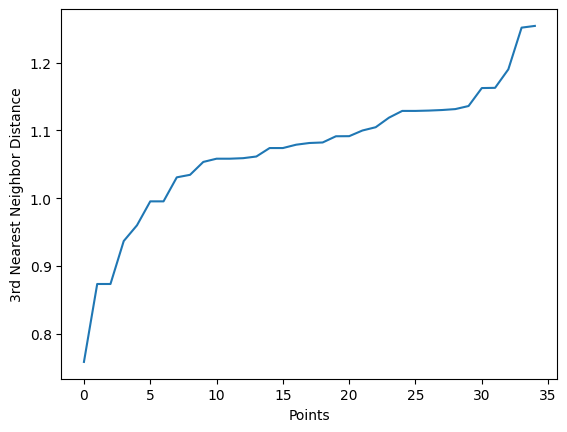

In [36]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculer les distances au 3ème voisin le plus proche
nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

# Trier les distances
distances = np.sort(distances[:,3], axis=0)

# Tracer le graphique du k-distance
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('3rd Nearest Neighbor Distance')
plt.show()

Another method

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# Chargement des données
df = pd.read_csv("C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/2 analysis and first preprocessing/liste_videos_pour_script_and_infos.csv")
df = df.iloc[:-1]
df.tail(1)
descriptions = df['description2'].values

# Prétraitement du texte
def preprocess_text(text):
    # Tokenisation et suppression des stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_descriptions = [preprocess_text(description) for description in descriptions]

# Vectorisation des descriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_descriptions)

# Conversion de la matrice TF-IDF éparses en dense
X_dense = X.toarray()


# Application de DBSCAN
clustering = AgglomerativeClustering(linkage='ward', n_clusters=None, distance_threshold=1.8)  # Vous pouvez ajuster la distance_threshold en fonction de vos besoins
clusters = clustering.fit_predict(X_dense)


# Ajout des étiquettes de cluster au dataframe
df['cluster'] = clusters

# Affichage des résultats
print(df[['description2', 'cluster']].head())


NameError: name 'pd' is not defined

In [60]:
# Extraction des caractéristiques importantes pour chaque cluster
def extract_features_from_cluster(cluster_texts, lang='english'):
    stop_words = stopwords.words(lang)
    vectorizer = TfidfVectorizer(max_features=10, stop_words=stop_words)  # Utiliser les stop words de nltk
    X = vectorizer.fit_transform(cluster_texts)
    feature_array = np.array(vectorizer.get_feature_names_out())
    return feature_array

cluster_titles = {}

for cluster_id in df['cluster'].unique():
    cluster_texts = df[df['cluster'] == cluster_id]['description2'].dropna().apply(preprocess_text)
    if cluster_texts.empty:
        cluster_titles[cluster_id] = "Cluster sans description"
        continue
    important_features = extract_features_from_cluster(cluster_texts)
    cluster_titles[cluster_id] = ", ".join(important_features)

# Afficher les titres de chaque cluster
for cluster_id, title in cluster_titles.items():
    print(f"Cluster {cluster_id}: {title}")

Cluster 0: accident, car, cars, driving, end, road, shows, situation, street, video
Cluster 2: accident, car, cars, driver, lane, left, pedestrian, road, situation, truck
Cluster 3: accident, car, driving, left, obstacles, road, shows, situation, straight, video
Cluster 1: accident, camera, car, cars, driver, driving, end, front, lane, situation


Zero-shot classification with bart-large-mnli

In [1]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\carrs-q_projectv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\carrs-q_projectv2\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hennecol\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations

In [20]:
candidate_labels = ['pedestrian', 'bicycle', 'car', 'no']
text = '''   There is a situation that will end in an accident.
The situation is that a car is driving in the same trajectory as the camera's car, but in the opposite direction. The two cars are on a two-lane road, with a concrete barrier in the middle. The other car is in the lane next to the camera's car, and it is trying to merge into the camera's car's lane. The camera's car is going faster than the other car, and the other car is not slowing down to merge. The two cars are getting closer and closer, and it is clear that they are going to collide.
The elements involved are the two cars.'''
result = classifier(text, candidate_labels)
class_ = result['scores'].index(max(result['scores']))
result['labels'][class_]
result

{'sequence': "   There is a situation that will end in an accident.\nThe situation is that a car is driving in the same trajectory as the camera's car, but in the opposite direction. The two cars are on a two-lane road, with a concrete barrier in the middle. The other car is in the lane next to the camera's car, and it is trying to merge into the camera's car's lane. The camera's car is going faster than the other car, and the other car is not slowing down to merge. The two cars are getting closer and closer, and it is clear that they are going to collide.\nThe elements involved are the two cars.",
 'labels': ['car', 'no', 'pedestrian', 'bicycle'],
 'scores': [0.6507548689842224,
  0.2993185520172119,
  0.03535502403974533,
  0.014571523293852806]}

In [32]:
l = []
for index, row in df.iterrows():
    text = row['description2']
    result = classifier(text, candidate_labels)
    # class_ = result['scores'].index(max(result['scores']))
    # row['class'] = result['labels'][class_]
    df.at[index, 'class_'] = result['labels'][0]

    


df

,nom,duree,type,ordre,risk_time,description,color,description2,color2,Unnamed: 9,cluster,class,class_
0,15_low1_1.mp4,22.67,1.0,1.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1,no,no
1,15_low3_2.mp4,11.83,1.0,2.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1,no,no
2,5 - weekly 11.mp4,4.40,1.0,3.0,3.5,"Yes, I can spot a situation where an accident...",NaN,"Yes, I can spot a situation that will end in ...",1.0,NaN,0,no,pedestrian
3,11 controls 6.mp4,11.58,1.0,4.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1,no,no
4,10 controls 7.mp4,15.19,1.0,5.0,10.2,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,2,no,no
5,1 weekly - 6.mp4,5.31,1.0,6.0,3.7,"Yes, I can spot a situation where an accident...",NaN,"No, there is no situation in the video that w...",NaN,NaN,1,no,no
6,2 compil - 1.mp4,8.55,1.0,7.0,5.5,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",NaN,NaN,1,no,car
7,6 - weekly 7.mp4,15.02,1.0,8.0,1.4,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,1,no,no
8,10 controls 2.mp4,22.21,1.0,9.0,10,"Yes, there is a situation where an accident i...",NaN,There is a situation that will end in an acci...,NaN,NaN,0,no,car
9,15_low1_3.mp4,22.74,1.0,10.0,-,"Yes, I can spot a situation where an accident...",NaN,"No, I cannot spot a situation that will end i...",1.0,NaN,0,no,no


In [33]:
df.to_csv('classified_videos.csv')